In [1]:
%run utils.ipynb

In [2]:
from time import time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans

from sklearn.mixture import GaussianMixture as EM
from sklearn import datasets
from sklearn.preprocessing import MinMaxScaler, scale
from sklearn.metrics import silhouette_samples, silhouette_score
from sklearn.metrics import roc_auc_score, accuracy_score, f1_score, precision_score, recall_score, confusion_matrix
import matplotlib.cm as cm
import itertools
import timeit
from collections import Counter

def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

from sklearn.mixture import GaussianMixture as EM
from sklearn.metrics import silhouette_score as sil_score, f1_score, homogeneity_score
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA, FastICA as ICA
from sklearn.random_projection import GaussianRandomProjection as GRP, SparseRandomProjection as RCA
from sklearn.ensemble import RandomForestClassifier as RFC
from itertools import product
from collections import defaultdict
from sklearn.metrics.pairwise import pairwise_distances
from matplotlib.ticker import MaxNLocator

def pairwiseDistCorr(X1,X2):
    assert X1.shape[0] == X2.shape[0]
    
    d1 = pairwise_distances(X1)
    d2 = pairwise_distances(X2)
    return np.corrcoef(d1.ravel(),d2.ravel())[0,1]

def run_PCA(X,y,title):
    
    pca = PCA(random_state=5).fit(X) #for all components
    cum_var = np.cumsum(pca.explained_variance_ratio_)

    fig, ax1 = plt.subplots()
    ax1.plot(list(range(1,len(pca.explained_variance_ratio_)+1)), cum_var, 'b-')
    ax1.set_xlabel('Principal Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Cumulative Explained Variance Ratio', color='b')
    ax1.tick_params('y', colors='b')
    ax1.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(list(range(1,len(pca.explained_variance_ratio_)+1)), pca.singular_values_, 'r-')
    ax2.set_ylabel('Eigenvalues', color='r')
    ax2.tick_params('y', colors='r')
    ax2.xaxis.set_major_locator(MaxNLocator(integer=True))
    plt.grid(False)

    plt.title("PCA Explained Variance and Eigenvalues: "+ title)
    fig.tight_layout()
    plt.show()
    
def run_ICA(X,y,title):
    
    dims = list(np.arange(2,(X.shape[1]-1),3))
    dims.append(X.shape[1])
    ica = ICA(random_state=5)
    kurt = []

    for dim in dims:
        ica.set_params(n_components=dim)
        tmp = ica.fit_transform(X)
        tmp = pd.DataFrame(tmp)
        tmp = tmp.kurt(axis=0)
        kurt.append(tmp.abs().mean())

    plt.figure()
    plt.title("ICA Kurtosis: "+ title)
    plt.xlabel("Independent Components")
    plt.ylabel("Avg Kurtosis Across IC")
    plt.plot(dims, kurt, 'b-')
    plt.grid(False)
    plt.show()

def run_RCA(X,y,title):
    
    dims = list(np.arange(2,(X.shape[1]-1),3))
    dims.append(X.shape[1])
    tmp = defaultdict(dict)

    for i,dim in product(range(5),dims):
        rp = RCA(random_state=i, n_components=dim)
        tmp[dim][i] = pairwiseDistCorr(rp.fit_transform(X), X)
    tmp = pd.DataFrame(tmp).T
    mean_recon = tmp.mean(axis=1).tolist()
    std_recon = tmp.std(axis=1).tolist()


    fig, ax1 = plt.subplots()
    ax1.plot(dims,mean_recon, 'b-')
    ax1.set_xlabel('Random Components')
    # Make the y-axis label, ticks and tick labels match the line color.
    ax1.set_ylabel('Mean Reconstruction Correlation', color='b')
    ax1.tick_params('y', colors='b')
    plt.grid(False)

    ax2 = ax1.twinx()
    ax2.plot(dims,std_recon, 'm-')
    ax2.set_ylabel('STD Reconstruction Correlation', color='m')
    ax2.tick_params('y', colors='m')
    plt.grid(False)

    plt.title("Random Components for 5 Restarts: "+ title)
    fig.tight_layout()
    plt.show()
    
def run_RFC(X,y,df_original):
    rfc = RFC(n_estimators=500,min_samples_leaf=round(len(X)*.01),random_state=5,n_jobs=-1)
    imp = rfc.fit(X,y).feature_importances_ 
    imp = pd.DataFrame(imp,columns=['Feature Importance'],index=df_original.columns[2::])
    imp.sort_values(by=['Feature Importance'],inplace=True,ascending=False)
    imp['Cum Sum'] = imp['Feature Importance'].cumsum()
    imp = imp[imp['Cum Sum']<=0.95]
    top_cols = imp.index.tolist()
    return imp, top_cols

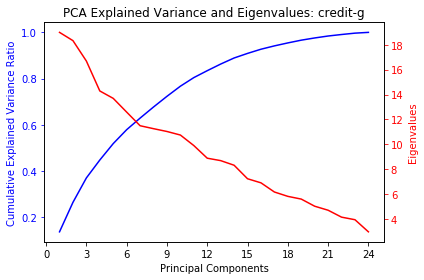

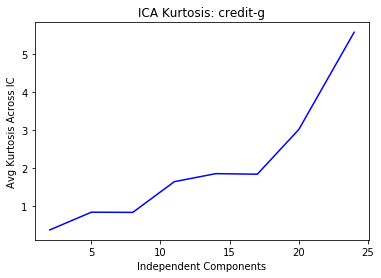

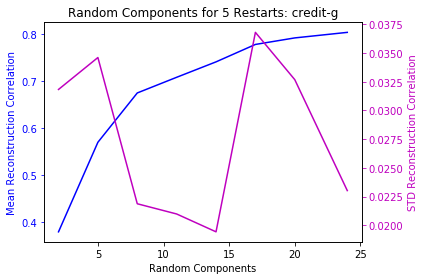

In [3]:
np.random.seed(5)

data = cdata
run_PCA(data['X'],data['y'],data['name'])
run_ICA(data['X'],data['y'],data['name'])
run_RCA(data['X'],data['y'],data['name'])
# imp_phish, topcols_phish = run_RFC(phishX,phishY,df_phish)


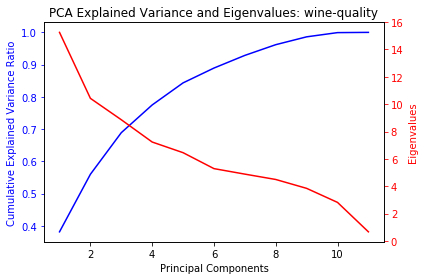

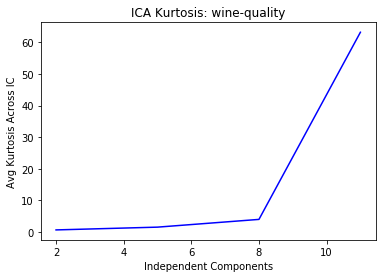

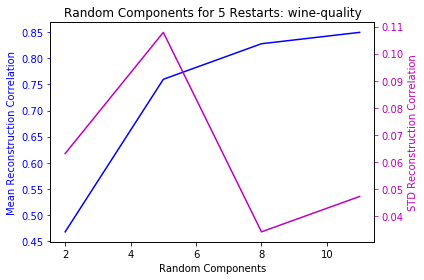

In [4]:
np.random.seed(5)

data = wdata
run_PCA(data['X'],data['y'],data['name'])
run_ICA(data['X'],data['y'],data['name'])
run_RCA(data['X'],data['y'],data['name'])
# imp_phish, topcols_phish = run_RFC(phishX,phishY,df_phish)

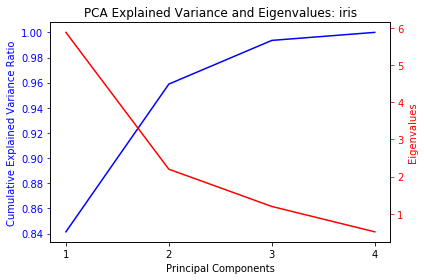

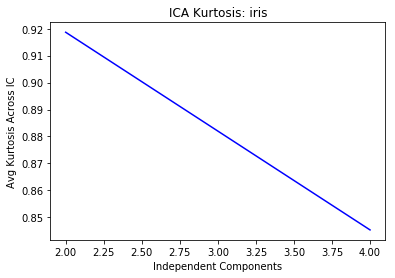

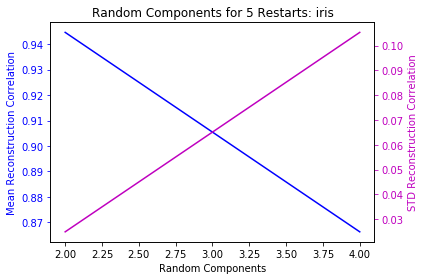

In [5]:
np.random.seed(5)

data = idata
run_PCA(data['X'],data['y'],data['name'])
run_ICA(data['X'],data['y'],data['name'])
run_RCA(data['X'],data['y'],data['name'])
# imp_phish, topcols_phish = run_RFC(phishX,phishY,df_phish)